In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("House Price Data.csv")
df.head ()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
cdf = df [['price', 'bedrooms', 'yr_built', 'yr_renovated']]
cdf.head ()

,price,bedrooms,yr_built,yr_renovated
0,313000.0,3.0,1955,2005
1,2384000.0,5.0,1921,0
2,342000.0,3.0,1966,0
3,420000.0,3.0,1963,0
4,550000.0,4.0,1976,1992


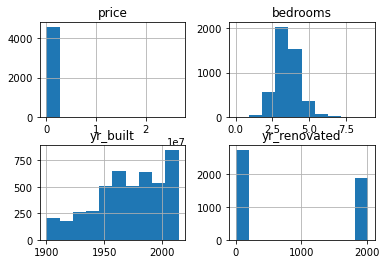

In [5]:
viz = cdf[['price', 'bedrooms', 'yr_built', 'yr_renovated']]
viz.hist()
plt.show()

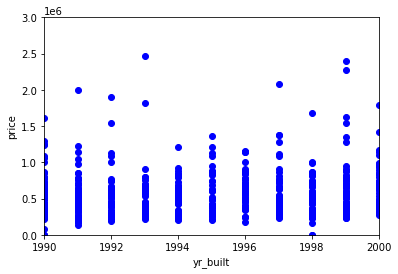

In [19]:
plt.scatter(cdf.yr_built, cdf.price,  color='blue')
plt.xlabel("yr_built")
plt.ylabel("price")
plt.ylim(0, 3000000)
plt.xlim(1990, 2000)
plt.show()

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['yr_built']])
train_y = np.asanyarray(train[['price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[296.93675644]]
Intercept:  [-38697.99178251]


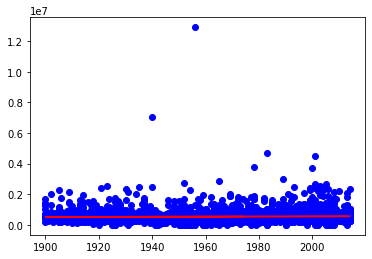

In [17]:
plt.scatter(train.yr_built, train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['yr_built']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 265005.32
Residual sum of squares (MSE): 832438111603.70
R2-score: -0.00
